## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns
pd.show_versions()
import sys
import graphviz
sys.executable
#import graphviz


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.5.final.0
python-bits: 32
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: None.None

pandas: 0.24.0
pytest: None
pip: 18.1
setuptools: 39.0.1
Cython: None
numpy: 1.14.3
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: None
patsy: 0.5.1
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 2.2.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: 4.2.5
bs4: None
html5lib: 1.0.1
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


'c:\\users\\rapp\\appdata\\local\\programs\\python\\python36-32\\python.exe'

In [36]:
from glob import glob
dataframe = pd.DataFrame()
#descriptors = ['OLS_SFC_0617Train', 'OLS_SFC_2014Train', 'OLS_UASFC_0617Train', 'OLS_UASFC_2014Train', \
#               'CV_OLS_SFC_0617Train', 'CV_OLS_SFC_0617Train_noWD', 'CV_OLS_SFC_2014Train', 'CV_OLS_2014Train_noWD','CV_OLS_UASFCTrain_0617', \
#               'CV_OLS_UASFC_1617Train_noWD', 'CV_OLS_UASFCTrain_2014',  'CV_OLS_UASFCTrain_2014_noWD']


filenames = glob(r'C:\Users\RAPP\Documents\Capstone\Projects\model_predictions\*.csv')
print(filenames)
#print(str(filenames[0].find('.'))+':'+str(filenames[0].rfind('/')))

descriptors =  [fn[(fn.rfind('\\')+1):fn.rfind('.csv')] for fn in filenames]
print(descriptors[0][0:6])
IDs = [id[0:id.find('_')] for id in descriptors]
print(IDs)



model_data = [pd.read_csv(filename, header = None, names = ['actual_snf', 'predicted_snf']) for filename in filenames]
#print(list_of_dfs)

print(model_data[1]['actual_snf'].mean())




['C:\\Users\\RAPP\\Documents\\Capstone\\Projects\\model_predictions\\A1-SFC_0617Train_CVOLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Projects\\model_predictions\\A1-UASFC_0617Train_CVOLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Projects\\model_predictions\\A2-SFC_0617Train_lowp_CVOLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Projects\\model_predictions\\A2-UASFC_0617Train_lowp_CVOLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Projects\\model_predictions\\B1-SFC_2014Train_CVOLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Projects\\model_predictions\\B1-UASFC_2014Train_CVOLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Projects\\model_predictions\\B2-SFC_2014Train_lowp_CVOLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Projects\\model_predictions\\B2-UASFC_2014Train_lowp_CVOLS.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\Projects\\model_predictions\\UASFC_0617Train_noWD_CVOLS.csv']
A1-SFC
['A1-SFC', 'A1-UASFC', 'A2-SFC', 'A2-UASFC', 'B1-SFC', 'B1-UASFC', 'B2-SFC', 'B2-UASFC'

In [13]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from regressors import stats
import csv


slopes, intercepts, r_values, p_values, std_errs, mses, rmses = [],[],[],[],[], [], [] 
R2_scores, accuracys, rmse_w_mean_actual_snfs =[], [], []
maes, mpes, mapes, means_actual, means_predict = [], [], [], [], []
all_Ytest_predictions, all_Ytests = [], []
all_Ytest_predictions_arrays, all_Ytests_arrays = [],[]
Ytest_predictions = []    


#Loop through
for scenario in np.arange(0,len(model_data),1):
 
 actual_snf = model_data[scenario]['actual_snf']
 predicted_snf = model_data[scenario]['predicted_snf']


  
 R2_scores.append(r2_score( actual_snf,predicted_snf,))
 slope, intercept, r_value, p_value, std_err = linregress(predicted_snf, actual_snf)    
 slopes.append(slope)
 intercepts.append(intercept)
 r_values.append(r_value)
 p_values.append(p_value)
 std_errs.append(std_err)
 mses.append(mean_squared_error(predicted_snf, actual_snf)) 
 rmses.append(np.sqrt(mean_squared_error(predicted_snf, actual_snf)))
 all_Ytest_predictions_arrays.append(Ytest_predictions)   #creates list of arrays
 all_Ytests_arrays.append(actual_snf)   #creates list of arrays
 #print(str(R2_scores))
    

#Calculate Mean Absolute Error
 mae_sum = np.sum(abs(actual_snf-predicted_snf))
 maes.append(mae_sum/len(actual_snf))

#Calculate Mean Absolute Percentage Error
 mape_sum = np.sum(abs((actual_snf-predicted_snf)/actual_snf))
 mapes.append(mape_sum/len(actual_snf))

#Calcluate Mean Percentage Error
 mpe_sum = np.sum((actual_snf-predicted_snf)/actual_snf)
 mpes.append(mpe_sum/len(actual_snf))        


#Calculate mean
 means_actual.append(actual_snf.mean())
 means_predict.append(predicted_snf.mean())

 #Calculate RMSE if mean snowfall of dataset is used
 rmse_w_mean_actual_snfs.append(np.sqrt(mean_squared_error([actual_snf.mean()]*len(actual_snf), actual_snf)))

 #print('Mean Cross Val R2 score: '+ str(R2_scores))
 #print('Mean RMSE:' + str(rmses))
#print(accuracys)
print(x.mean for x in accuracys) 
print([np.mean(x) for x in np.abs(accuracys)])
print(maes, mapes, mpes)
    
#all_Ytest_predictions = [val for sublist in  all_Ytest_predictions_arrays for val in sublist]   #flattens list of arrays into single list of values
#all_Ytests = [val for sublist in   all_Ytests_arrays for val in sublist]   #flattens list of arrays into single list of values





<generator object <genexpr> at 0x00EBC9F0>
[]
[1.50880811215547, 1.4918559462119627, 1.50880811215547, 1.4925034192590674, 1.4995624844696636, 1.5853716277244008, 1.5390587931354074, 1.5338476251688709, 1.49186895428735] [0.33125845023341444, 0.3337993726310909, 0.33125845023341444, 0.33175195945670094, 0.33040089635845105, 0.36108658439629415, 0.33932028988190427, 0.34485000956501355, 0.3294038811222904] [-0.13624203723942288, -0.12608158599963293, -0.13624203723942288, -0.13137920174177464, -0.1360716429243968, -0.14653936948252444, -0.14391864201312665, -0.14868570752994487, -0.13419089089699882]


In [39]:
from tabulate import tabulate

tbl = zip(IDs, descriptors, np.round(R2_scores,3), np.round([i ** 2 for i in r_values],3), np.round(p_values,3), np.round(rmses,3),  np.round(maes,3), np.round(mapes,3), np.round(mpes,3), np.round(means_actual,3),  np.round(means_predict,3), np.round(rmse_w_mean_actual_snfs,3))  
print(tabulate(tbl, headers=['ID', 'Model Data', 'R2 Score','R Squared', "p vaue", 'RMSE', 'MAE','MAPE', 'MPE', 'Actual Mean', 'Predicted Mean', 'RMSE with mean actual snowfall'], tablefmt='github'))

| ID       | Model Data                    |   R2 Score |   R Squared |   p vaue |   RMSE |   MAE |   MAPE |    MPE |   Actual Mean |   Predicted Mean |   RMSE with mean actual snowfall |
|----------|-------------------------------|------------|-------------|----------|--------|-------|--------|--------|---------------|------------------|----------------------------------|
| A1-SFC   | A1-SFC_0617Train_CVOLS        |      0.033 |       0.044 |    0.002 |  2.12  | 1.509 |  0.331 | -0.136 |         4.667 |            4.645 |                            2.155 |
| A1-UASFC | A1-UASFC_0617Train_CVOLS      |      0.076 |       0.101 |    0     |  2.071 | 1.492 |  0.334 | -0.126 |         4.667 |            4.658 |                            2.155 |
| A2-SFC   | A2-SFC_0617Train_lowp_CVOLS   |      0.033 |       0.044 |    0.002 |  2.12  | 1.509 |  0.331 | -0.136 |         4.667 |            4.645 |                            2.155 |
| A2-UASFC | A2-UASFC_0617Train_lowp_CVOLS |      0.078 |   

**Make some plots**

        IDs                     Model_Data  R2_Score  R_Squared   p_value  \
0    A1-SFC         A1-SFC_0617Train_CVOLS  0.032624   0.043970  0.002094   
1  A1-UASFC       A1-UASFC_0617Train_CVOLS  0.076386   0.101441  0.000002   
2    A2-SFC    A2-SFC_0617Train_lowp_CVOLS  0.032624   0.043970  0.002094   
3  A2-UASFC  A2-UASFC_0617Train_lowp_CVOLS  0.077800   0.092409  0.000006   
4    B1-SFC         B1-SFC_2014Train_CVOLS  0.033989   0.047013  0.001454   
5  B1-UASFC       B1-UASFC_2014Train_CVOLS  0.003590   0.072515  0.000069   
6    B2-SFC    B2-SFC_2014Train_lowp_CVOLS  0.020988   0.030762  0.010329   
7  B2-UASFC  B2-UASFC_2014Train_lowp_CVOLS  0.024003   0.055933  0.000500   
8     UASFC     UASFC_0617Train_noWD_CVOLS  0.052148   0.071037  0.000082   

       RMSE       MAE      MAPE       MPE  Actual_Mean  Predicted_Mean  \
0  2.119724  1.508808  0.331258 -0.136242     4.666667        4.645470   
1  2.071223  1.491856  0.333799 -0.126082     4.666667        4.657641   
2  2.11

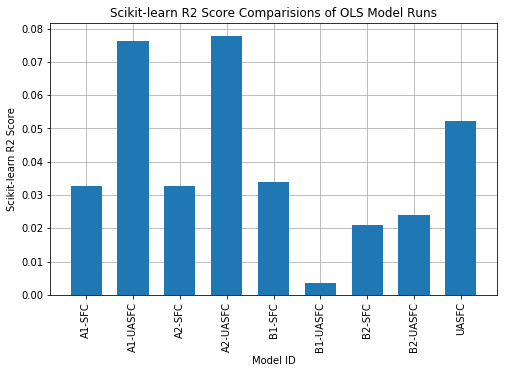

<function matplotlib.pyplot.show(*args, **kw)>

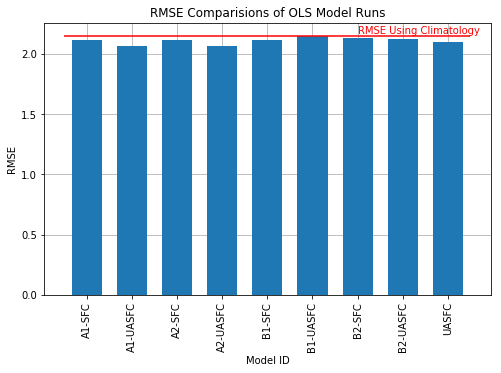

In [56]:
tbl = zip(IDs, descriptors, R2_scores, [i ** 2 for i in r_values], p_values, rmses, maes, mapes, mpes, means_actual, means_predict, rmse_w_mean_actual_snfs )  
summary_df = pd.DataFrame(tbl, columns = ['IDs', 'Model_Data', 'R2_Score','R_Squared', "p_value", 'RMSE', 'MAE','MAPE', 'MPE', 'Actual_Mean', 'Predicted_Mean', 'RMSE_with_mean_actual_snowfall'])
print(summary_df)
idx = [s.find('CV')>=0 for s in summary_df.Model_Data]
print(idx)



print(summary_df['Model_Data'])
fig = plt.figure(figsize=(8,5))
width = 1/1.5
ax = plt.subplot(1,1,1)
#plt.bar(x, y, width, color="blue")
plt.bar(summary_df['IDs'][idx], summary_df['R2_Score'][idx], width,  tick_label = [x.rstrip() for x in summary_df['IDs'][idx]])
plt.grid(True)
plt.xticks(rotation=90)
ax.set_axisbelow(True)
plt.ylabel('Scikit-learn R2 Score')
plt.xlabel('Model ID')
plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/R2_Score_summary.png', bbox_inches='tight')

plt.title('Scikit-learn R2 Score Comparisions of OLS Model Runs')


plt.show()


fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)
plt.bar(summary_df['IDs'][idx], summary_df['RMSE'][idx], width,  tick_label = [x.rstrip() for x in summary_df['IDs'][idx]])
plt.xticks(rotation=90) #, rotation_mode="default", ha = 'left', va = 'bottom')
plt.annotate('RMSE Using Climatology', xy=(6, 2.17), color = 'r')
plt.grid(True)
ax.set_axisbelow(True)
plt.ylabel('RMSE')
plt.xlabel('Model ID')
plt.hlines(2.15, -0.5,8.5, color = 'r')
plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/RMSE_summary.png', bbox_inches='tight')

plt.title('RMSE Comparisions of OLS Model Runs')
plt.show

#print([x.rstrip() for x in summary_df['Description ']])

['A1-SFC_0617Train_CVOLS', 'A1-UASFC_0617Train_CVOLS', 'A2-SFC_0617Train_lowp_CVOLS', 'A2-UASFC_0617Train_lowp_CVOLS', 'B1-SFC_2014Train_CVOLS', 'B1-UASFC_2014Train_CVOLS', 'B2-SFC_2014Train_lowp_CVOLS', 'B2-UASFC_2014Train_lowp_CVOLS', 'UASFC_0617Train_noWD_CVOLS']
A1-SFC_0617Train_CVOLS
A1-UASFC_0617Train_CVOLS
A2-SFC_0617Train_lowp_CVOLS
A2-UASFC_0617Train_lowp_CVOLS
B1-SFC_2014Train_CVOLS
B1-UASFC_2014Train_CVOLS
B2-SFC_2014Train_lowp_CVOLS
B2-UASFC_2014Train_lowp_CVOLS
UASFC_0617Train_noWD_CVOLS


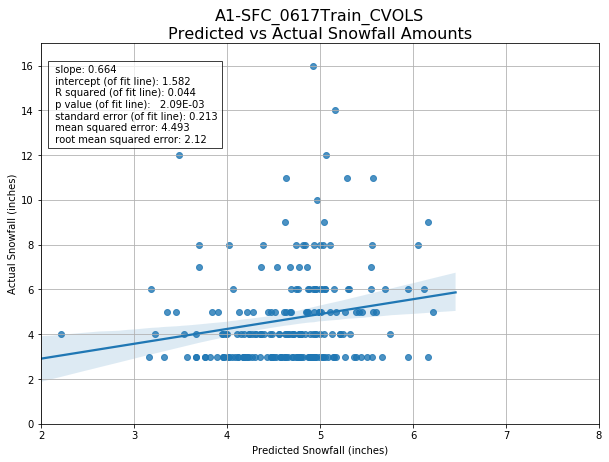

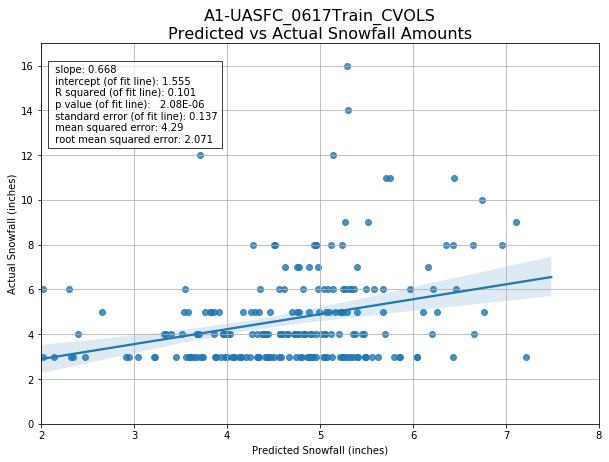

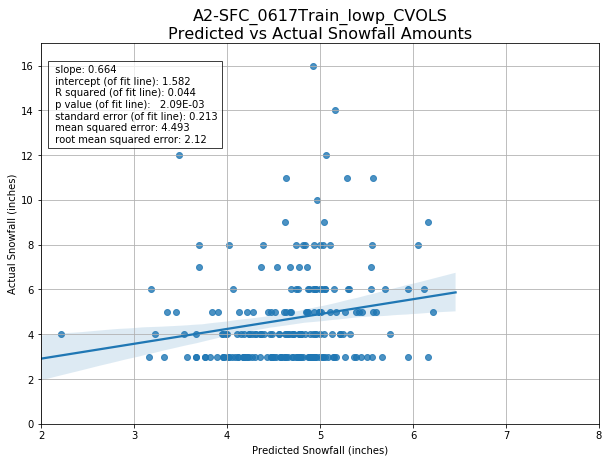

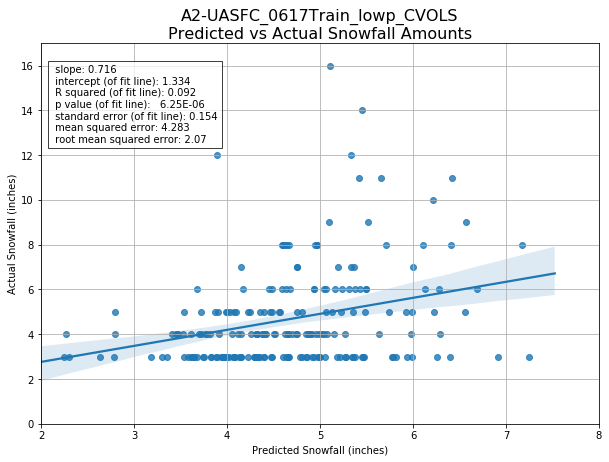

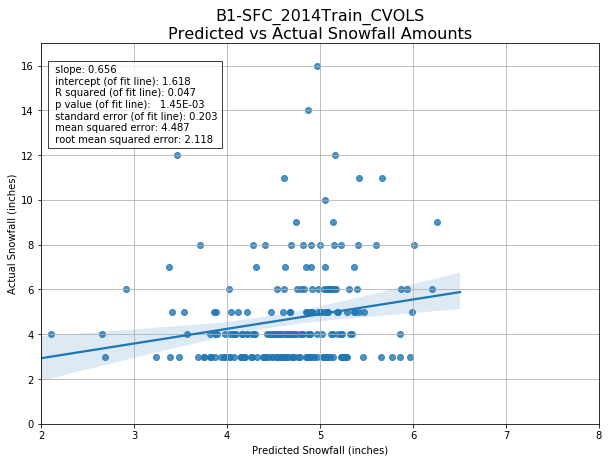

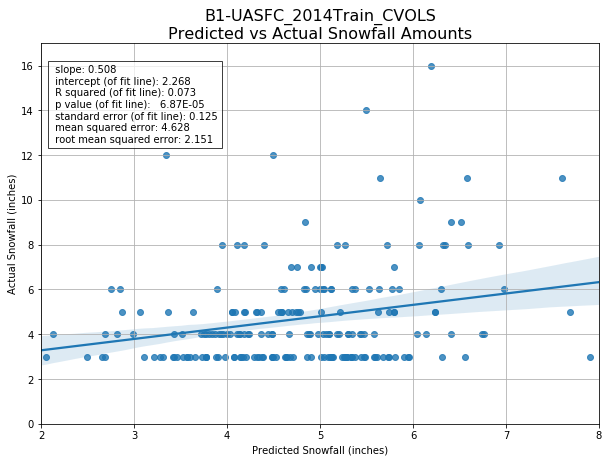

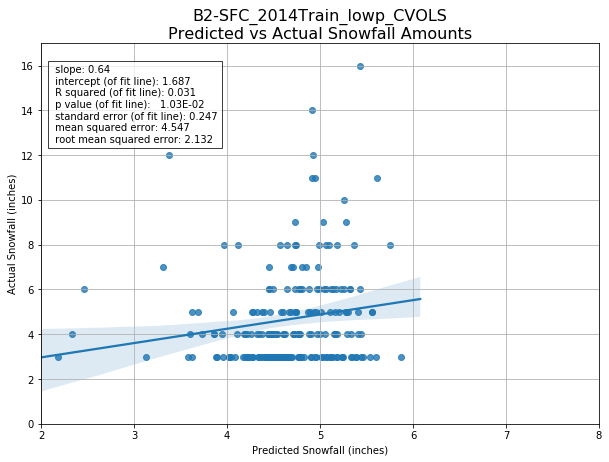

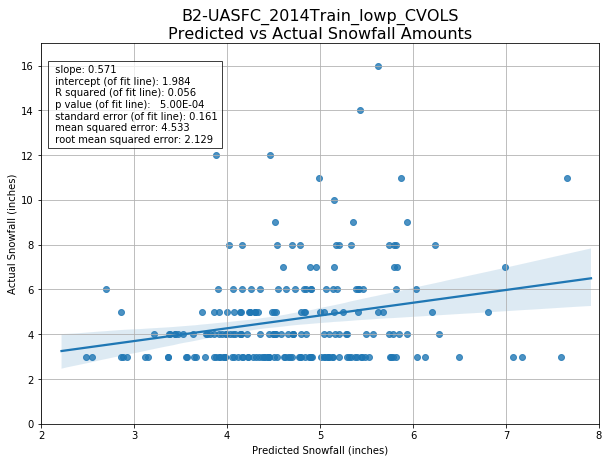

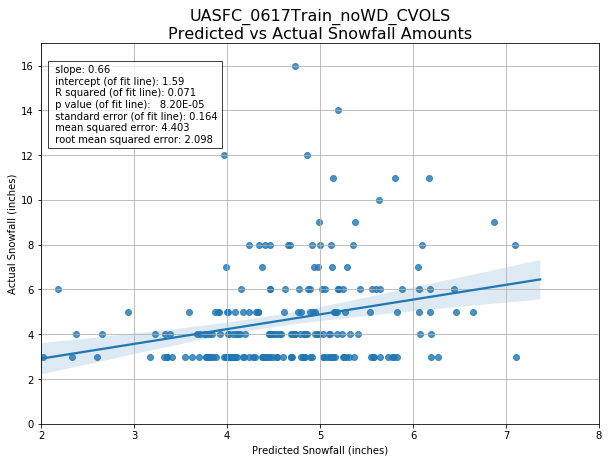

In [51]:
import regressors
print(descriptors)
for scenario in np.arange(0,len(model_data),1):
    print(descriptors[scenario])

for scenario in np.arange(0,len(model_data),1):
    actual_snf = model_data[scenario]['actual_snf']
    predicted_snf = model_data[scenario]['predicted_snf']
    
    
    fig = plt.figure(figsize=(10,7))
    sns.regplot(model_data[scenario]['predicted_snf'],model_data[scenario]['actual_snf'])
    
    
    bbox_props=dict(facecolor='red', alpha=0.75, fc = 'white')
    plt.annotate(' slope: ' + str(round(slopes[scenario],3)) +
                 '\n intercept (of fit line): ' + str(round(intercepts[scenario],3)) + 
                 '\n R squared (of fit line): ' + str(round(r_values[scenario]**2,3)) +  
                 '\n p value (of fit line): ' +  str(format(p_values[scenario], "10.2E")) + 
                 '\n standard error (of fit line): ' + str(round(std_errs[scenario],3)) +
                 '\n mean squared error: ' + str(round(mses[scenario],3)) +
                 '\n root mean squared error: ' + str(round(rmses[scenario],3)), \
                 xy=(0.02, 0.74), xycoords='axes fraction', fontsize=10, bbox = bbox_props)

    plt.xlabel('Predicted Snowfall (inches)')
    plt.ylabel('Actual Snowfall (inches)')
    plt.xlim([2,8])
    plt.ylim([0,17])
    plt.grid(True)
    plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/pred_vs_act_KFold_'+descriptors[scenario]+'.png',bbox_inches='tight')
    plt.title(descriptors[scenario]+'\nPredicted vs Actual Snowfall Amounts', fontsize = 16)




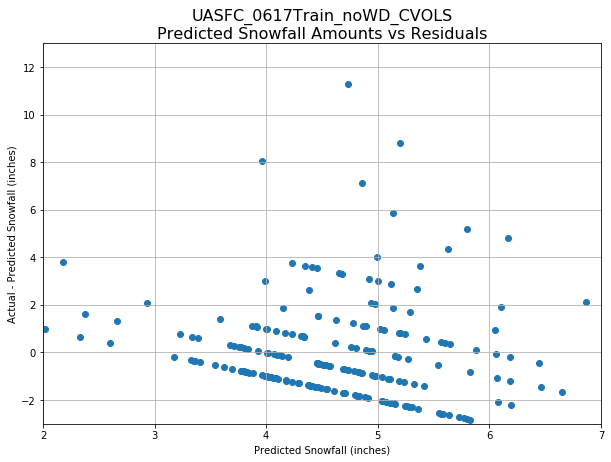

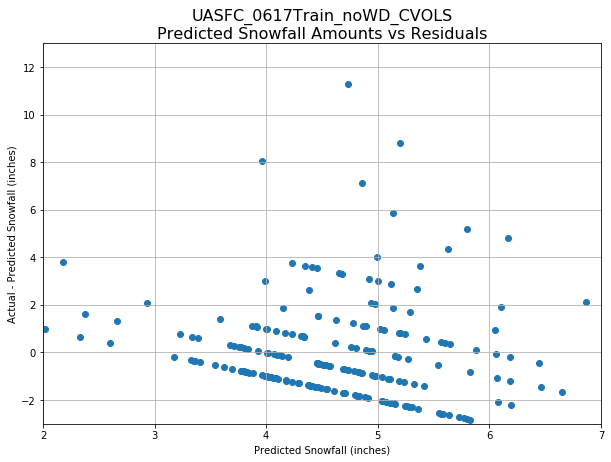

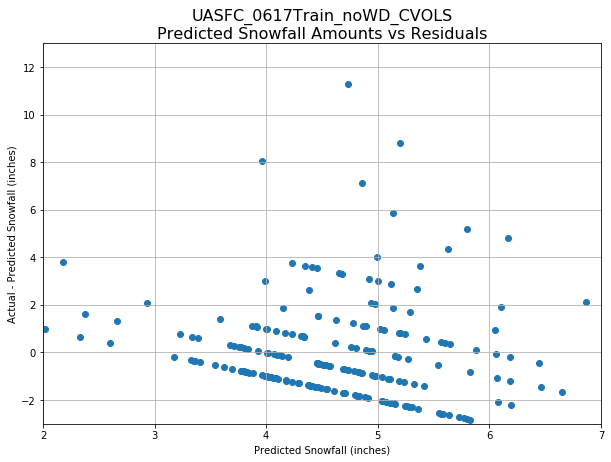

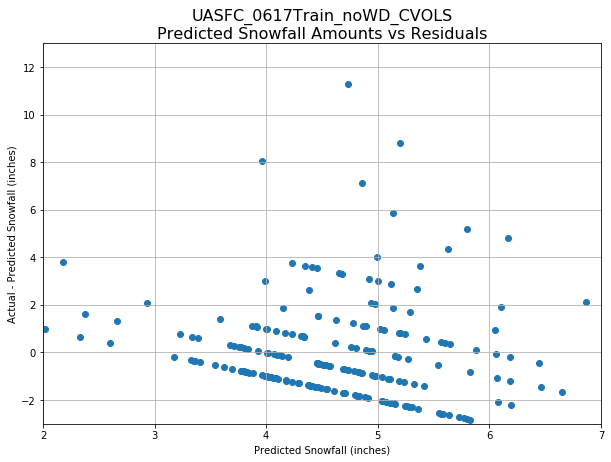

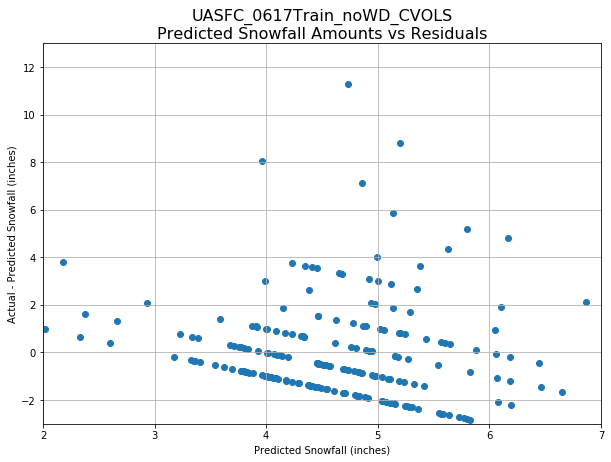

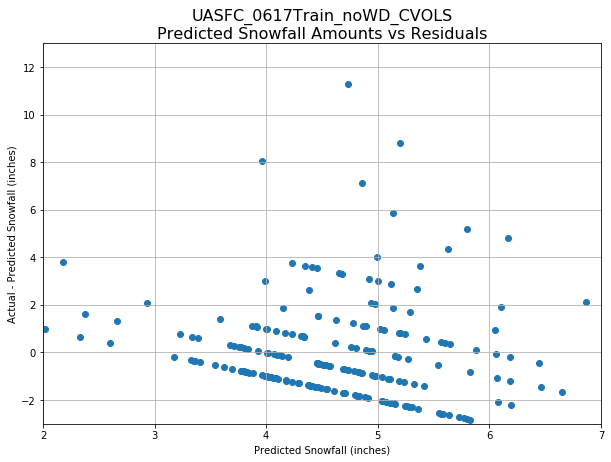

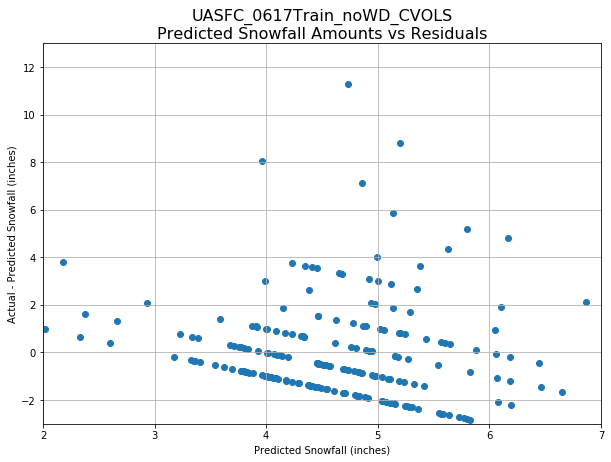

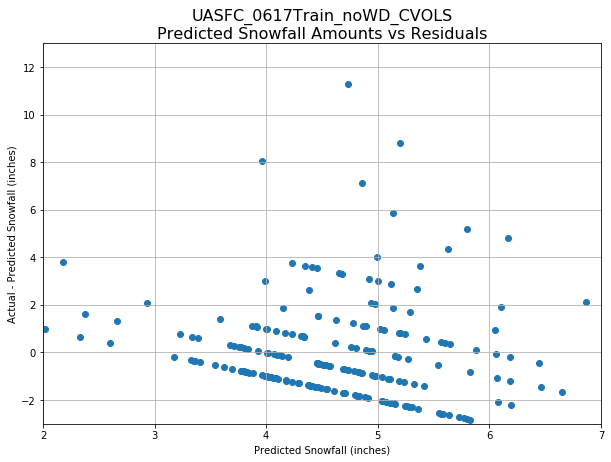

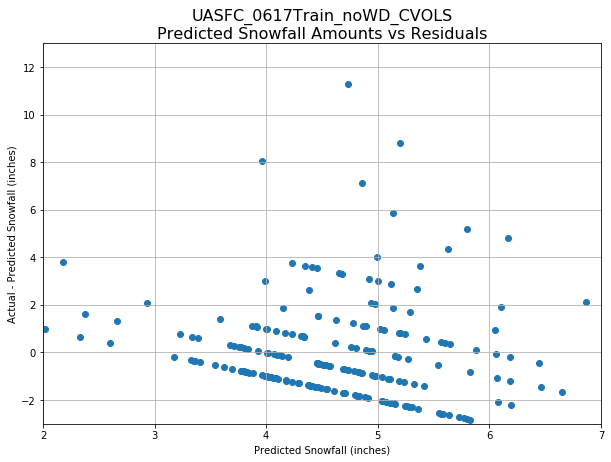

In [52]:
for pred_case in np.arange(0, len(model_data), 1):
    
   actual_snf = model_data[scenario]['actual_snf']
   predicted_snf = model_data[scenario]['predicted_snf'] 
    
   fig = plt.figure(figsize=(10,7))

   plt.scatter(predicted_snf, actual_snf - predicted_snf)

   plt.ylabel('Actual - Predicted Snowfall (inches)')
   plt.xlabel('Predicted Snowfall (inches)')
   plt.xlim([2,7])
   plt.ylim([-3,13])
   plt.grid(True)
   plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/resid_vs_pred_KFold_'+descriptors[scenario]+'.png',bbox_inches='tight')
   plt.title(descriptors[scenario]+'\nPredicted Snowfall Amounts vs Residuals', fontsize = 16)
   

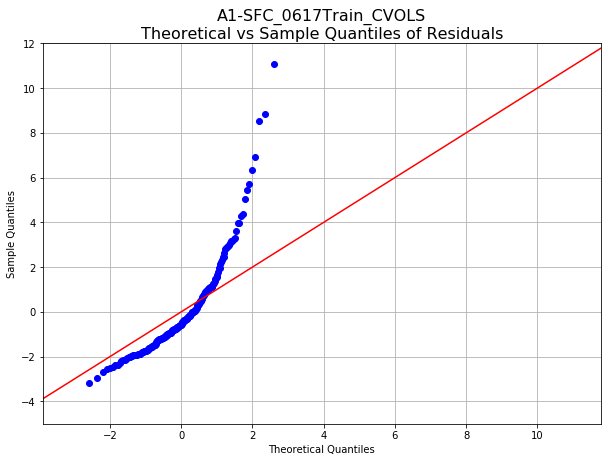

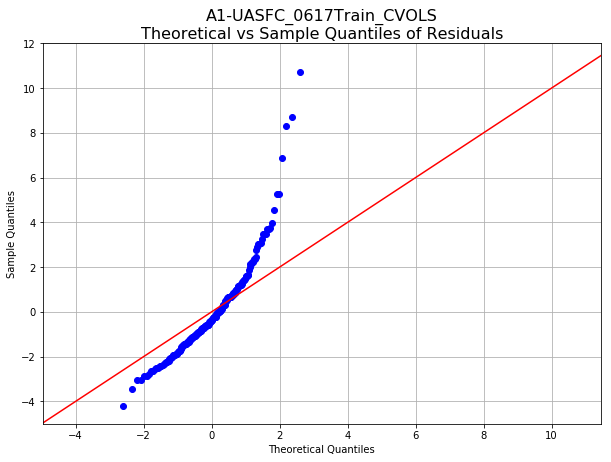

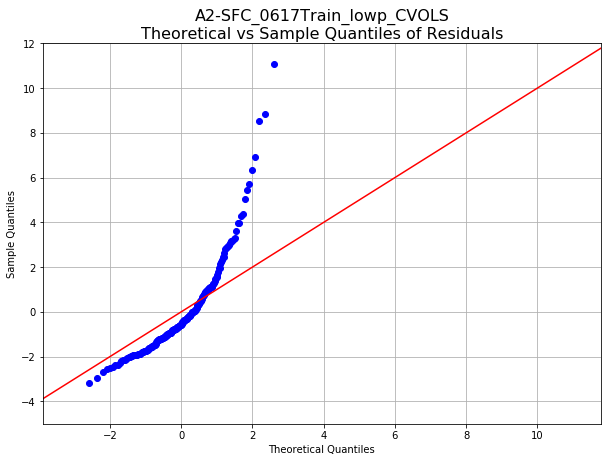

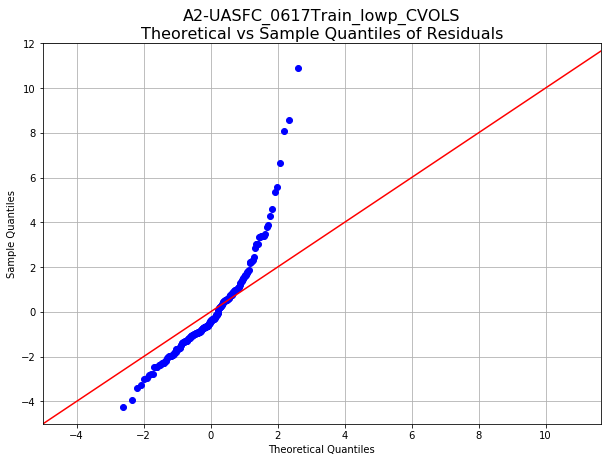

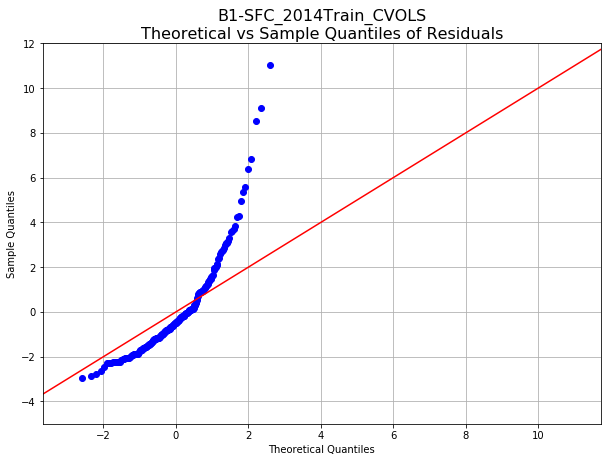

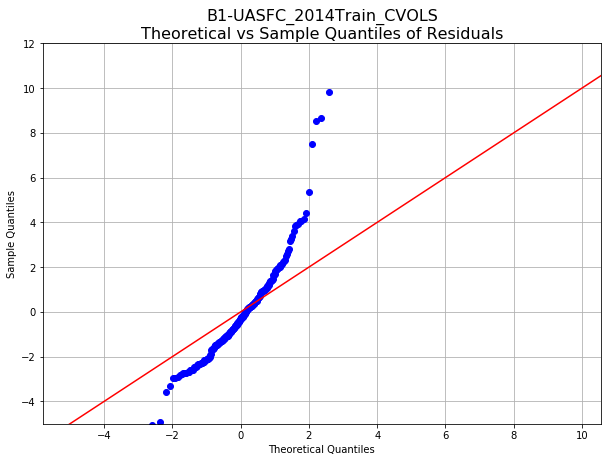

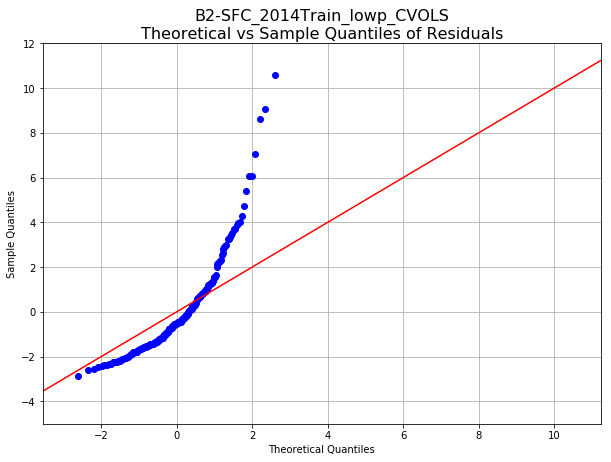

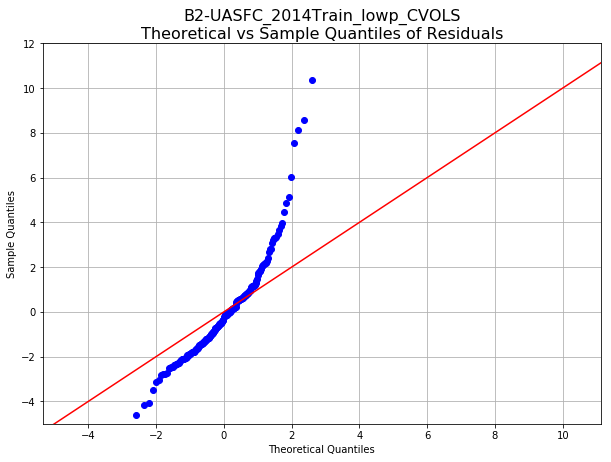

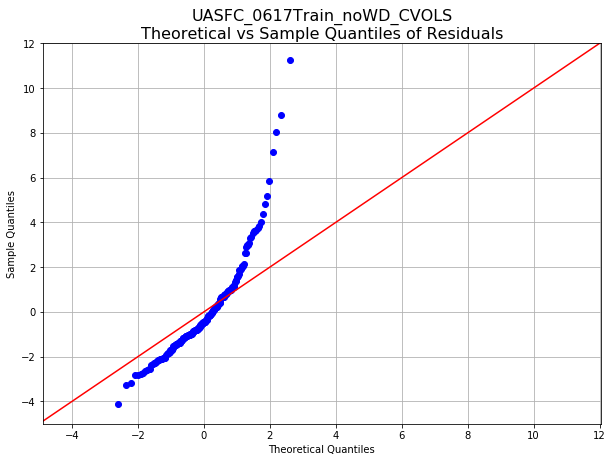

In [53]:
import statsmodels.api as sm
for scenario in np.arange(0, len(model_data), 1):
       actual_snf = model_data[scenario]['actual_snf']
       predicted_snf = model_data[scenario]['predicted_snf'] 


       residuals = actual_snf - predicted_snf 
       fig, ax = plt.subplots(figsize=(10, 7))
       qq2=sm.qqplot(residuals, line='45', ax = ax)    
       plt.ylim([-5,12])

       plt.grid(True)
       plt.grid(True)
       plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/qq_resid_KFold_'+descriptors[scenario]+'.png',bbox_inches='tight')
       plt.title(descriptors[scenario]+'\nTheoretical vs Sample Quantiles of Residuals', fontsize = 16)

    

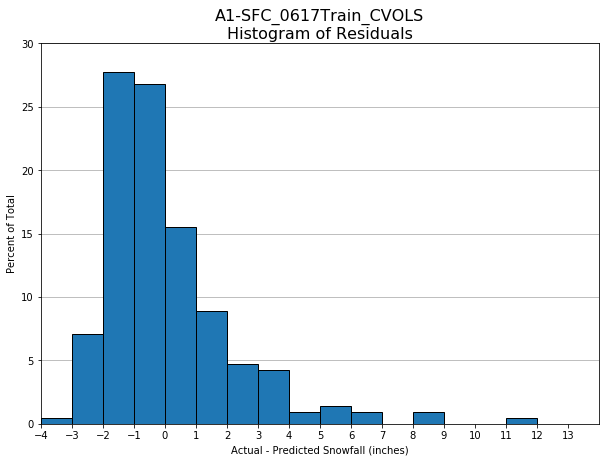

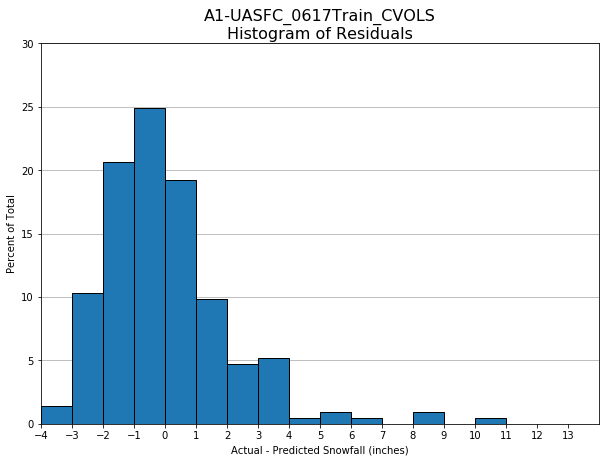

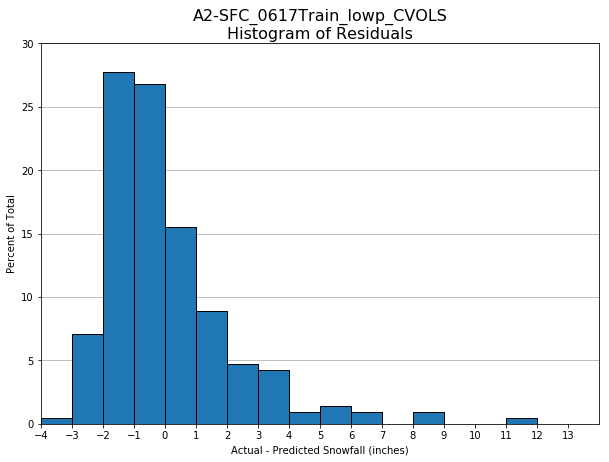

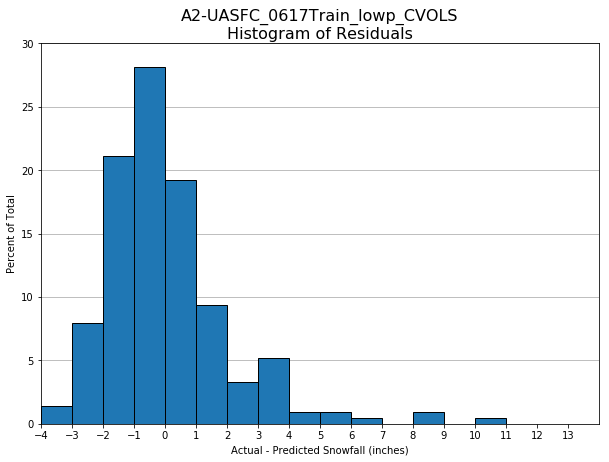

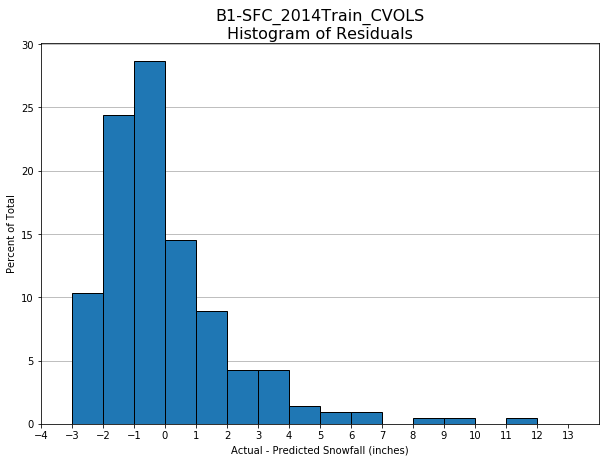

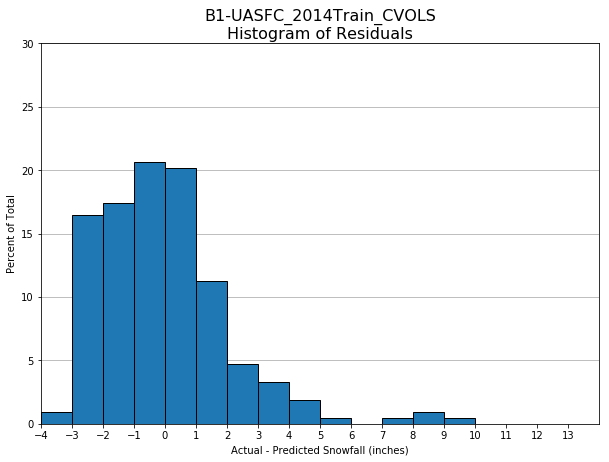

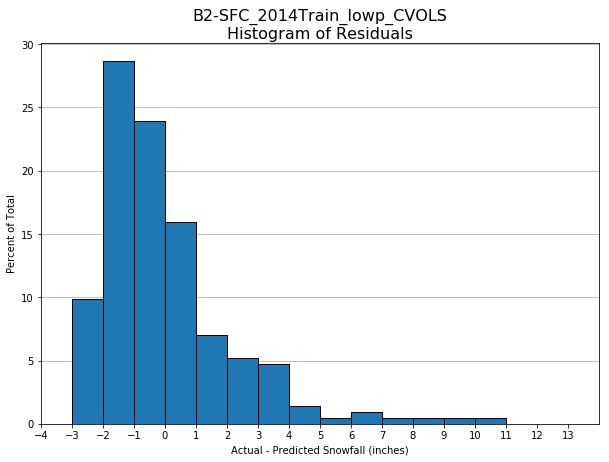

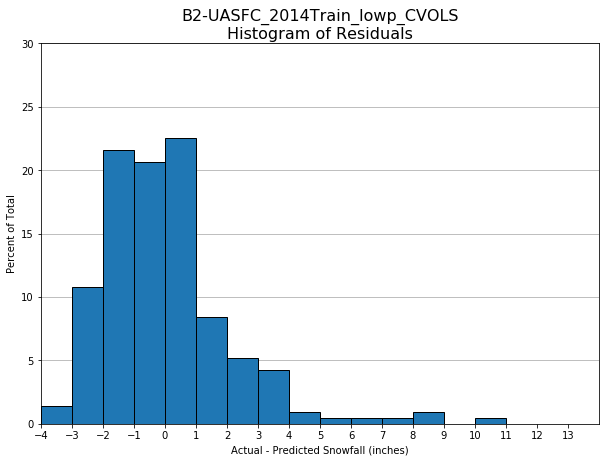

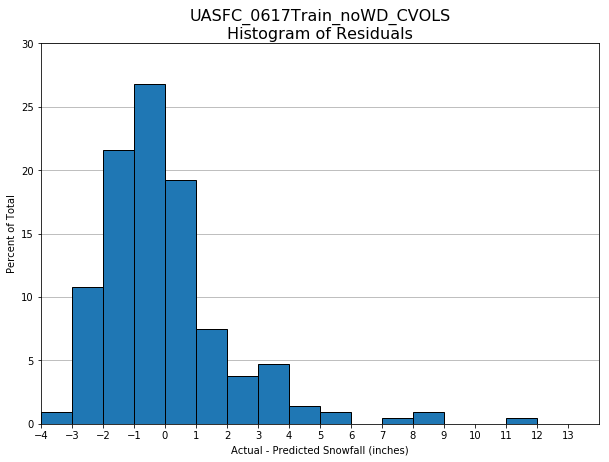

In [54]:
for scenario in np.arange(0, len(model_data), 1):
  actual_snf = model_data[scenario]['actual_snf']
  predicted_snf = model_data[scenario]['predicted_snf'] 

  diff =  actual_snf - predicted_snf
  
  fig = plt.figure(figsize=(10, 7))
  ax = plt.subplot(1,1,1)

  weights = np.ones_like(diff)/float(len(diff))
  plt.hist(diff, histtype = 'bar', weights=weights*100, \
           bins = np.arange(-4,14,1), align = 'mid', edgecolor = 'black') 

  plt.xlabel('Actual - Predicted Snowfall (inches)')
  plt.ylabel('Percent of Total')
  plt.xlim([-4,14])

  plt.xticks(np.arange(-4,14,1))
  plt.yticks(np.arange(0,31,5))
  ax.set_axisbelow(True)   #places gridlines behind bars
  plt.grid(True, axis = 'y')


  plt.title('', fontsize = 16)
  plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/hist_actual_minus_pred_KFold_'+descriptors[scenario]+'.png',bbox_inches='tight')
  plt.title(descriptors[scenario]+'\nHistogram of Residuals', fontsize = 16)

